<a href="https://colab.research.google.com/github/NataliaMCatalan/Workshops/blob/main/Workshop_Ironhack_Intro_Viz_Datos_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¡pingüinos!


In [3]:
#Importar las librerias y los datos

In [5]:
import pandas as pd
import seaborn as sns


In [6]:
df =sns.load_dataset("penguins")

In [9]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
###Comenzar a comprender el dataset

In [10]:
df.shape

(344, 7)

In [11]:
df.info() #Podemos ver que faltan valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Hay pingüinos e islas

In [12]:
df.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       Female    1
Gentoo   Biscoe     44.0            13.6           208.0              4350.0       Female    1
                    43.6            13.9           217.0              4900.0       Female    1
                    43.5            15.2           213.0              4650.0       Female    1
                                    14.2           220.0              4700.0       Female    1
                                                                                            ..
Adelie   Torgersen  36.6            17.8           185.0              3700.0       Female    1
                    36.2            17.2           187.0              3150.0       Female    1
                                    16.1           187.0              3550.0       Female    1
                    35.9            16.6           190.

In [13]:
df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [17]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [18]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

## Limpieza

In [23]:
df.drop(df[df["body_mass_g"].isnull()].index, axis = 0, inplace = True)

In [24]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [27]:
df["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

In [29]:
df["sex"] =df["sex"].fillna("Female")

In [30]:
df.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [31]:
df["sex"].value_counts()


Male      168
Female    165
            9
Name: sex, dtype: int64

#Visualización

In [32]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


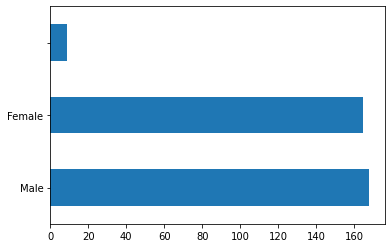

In [36]:
df["sex"].value_counts().plot(kind= "barh")

In [37]:
df_grouped = df.groupby(["sex","island"]).count()["species"]
df_grouped

sex     island   
        Biscoe        4
        Dream         1
        Torgersen     4
Female  Biscoe       80
        Dream        61
        Torgersen    24
Male    Biscoe       83
        Dream        62
        Torgersen    23
Name: species, dtype: int64

In [38]:
df_grouped = df_grouped.reset_index()

In [39]:
df_grouped

,sex,island,species
0,,Biscoe,4
1,,Dream,1
2,,Torgersen,4
3,Female,Biscoe,80
4,Female,Dream,61
5,Female,Torgersen,24
6,Male,Biscoe,83
7,Male,Dream,62
8,Male,Torgersen,23


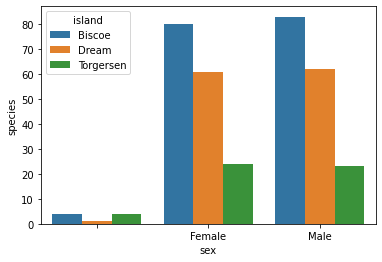

In [41]:
sns.barplot(data = df_grouped, x = "sex",y = "species", hue = "island" )

In [ ]:
#Estudiar previamente el tema
#Comprensión de los datos
#Sacar buenas conclusiones
#Storytelling
#data-to-viz.com
#Seaborn chatsheet